In [188]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [189]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)

    return idx
        

In [190]:
X = load_data()

In [191]:
print(X[:5], X.shape)

[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]] (300, 2)


In [192]:
initial_centroids = np.array([[3,3],[6,2], [8,5]])
idx = find_closest_centroids(X, initial_centroids)
print("First three elements in idx are:", idx[:3])


First three elements in idx are: [0 2 1]


In [193]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx==k]
        centroids[k] = np.mean(points, axis=0) # important to set axis=0

    return centroids

In [194]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [195]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8,6))

    for i in range(max_iters):
        print("k means iteration %d/%d" % (i, max_iters-1))

        idx = find_closest_centroids(X, centroids)

        # optional
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        # ----
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

In [196]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

k means iteration 0/9
k means iteration 1/9
k means iteration 2/9
k means iteration 3/9
k means iteration 4/9
k means iteration 5/9
k means iteration 6/9
k means iteration 7/9
k means iteration 8/9
k means iteration 9/9


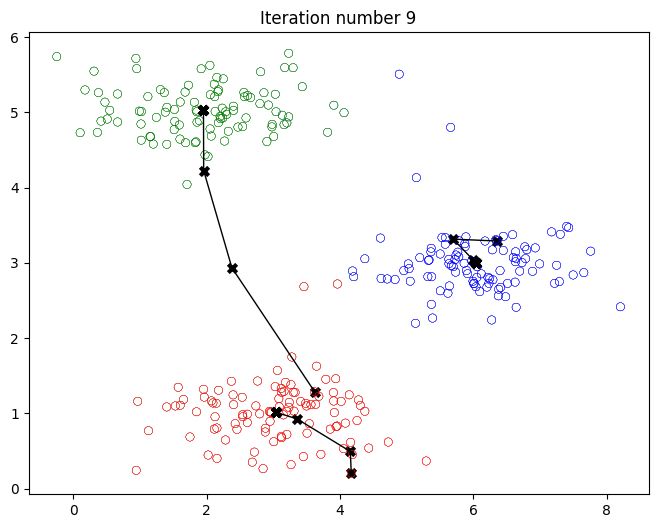

In [201]:
K = 3
max_iters = 10
initial_centroids = kMeans_init_centroids(X, K)
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [202]:
# image compression
original = plt.imread("compressed_10.png")

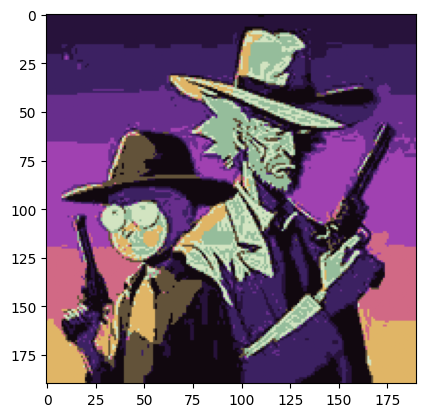

In [203]:
plt.imshow(original)

In [204]:
print("Shape of original is: ", original.shape) 

Shape of original is:  (190, 190, 3)


In [205]:
X_img = np.reshape(original, (original.shape[0] * original.shape[1], 3))
X_img.shape
#isko run karne par ye original -> 2d matrix banjayega

(36100, 3)

In [226]:
K = 2
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids,  max_iters)

k means iteration 0/9
k means iteration 1/9
k means iteration 2/9
k means iteration 3/9
k means iteration 4/9
k means iteration 5/9
k means iteration 6/9
k means iteration 7/9
k means iteration 8/9
k means iteration 9/9


<Figure size 800x600 with 0 Axes>

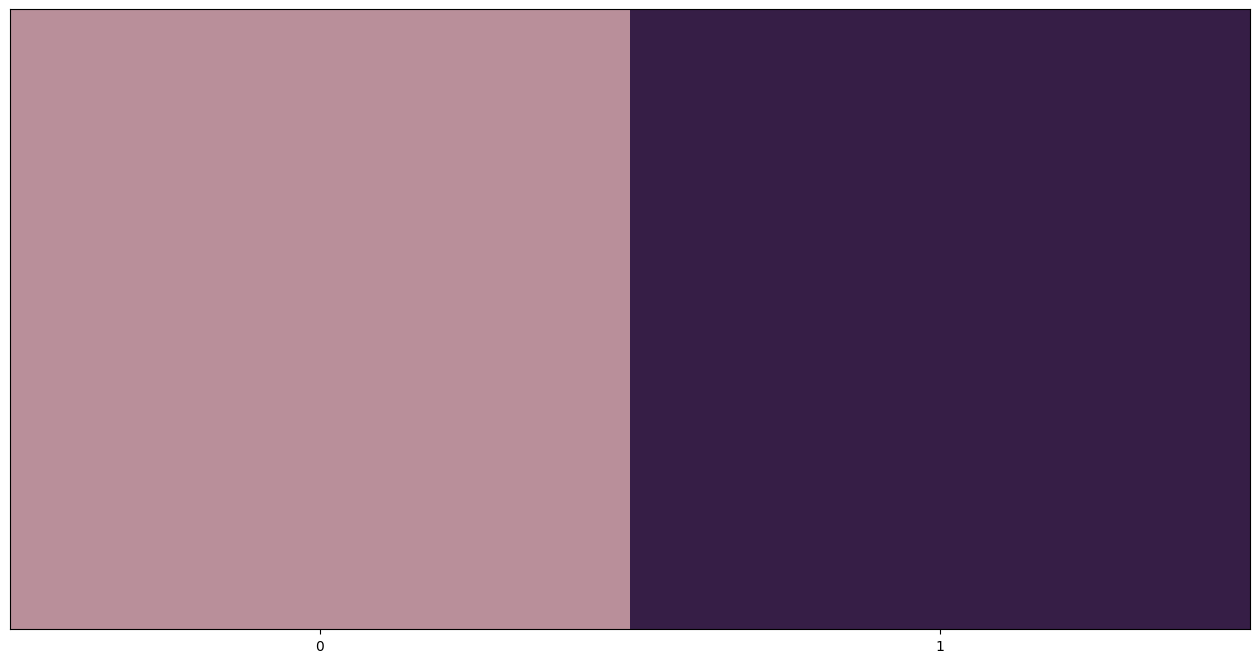

In [227]:
show_centroid_colors(centroids)

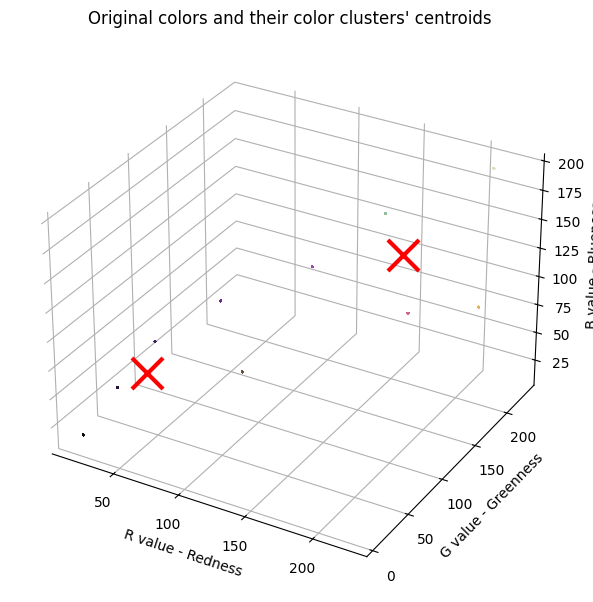

In [228]:
plot_kMeans_RGB(X_img, centroids, idx, K)

In [229]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, original.shape)

In [230]:
X_recovered.shape

(190, 190, 3)

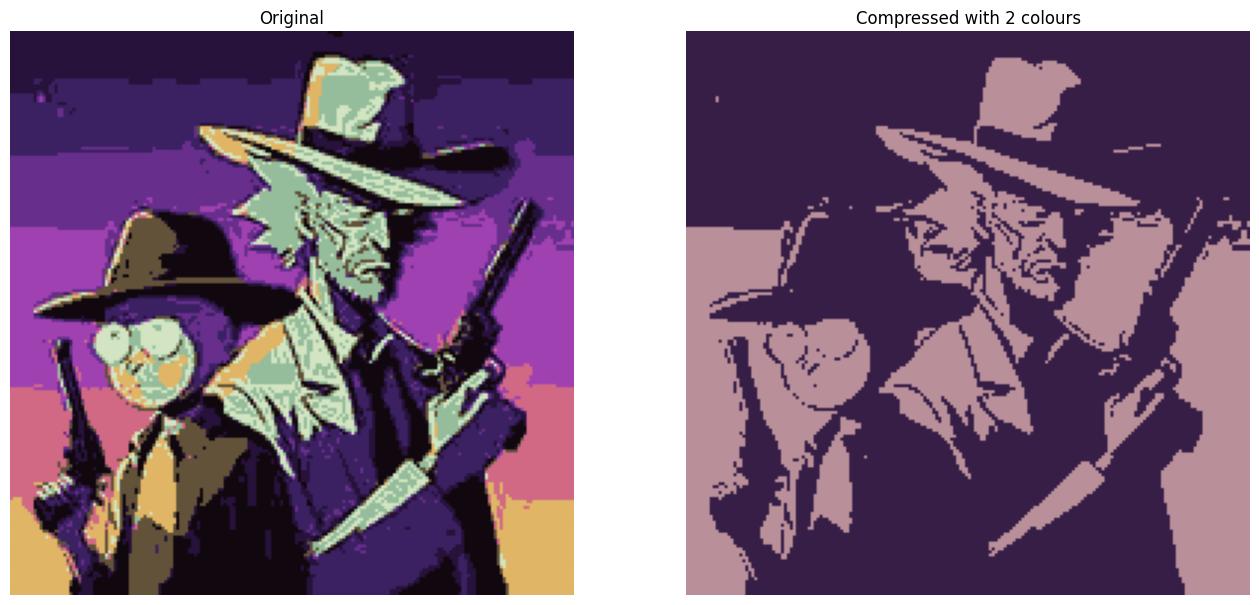

In [231]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')
ax[0].imshow(original)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [225]:
from sklearn.cluster import KMeans
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [182]:

def compress_image(path, n_clusters):
    image = io.imread(path)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis('off')


    rows, cols, _ = image.shape
    image_flat = image.reshape(rows * cols , 3 )

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(image_flat)

    compressed_image = kmeans.cluster_centers_[kmeans.labels_]

    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
    compressed_image = compressed_image.reshape(rows, cols, 3)
    
    op_path = f"compressed_{n_clusters}.png"
    io.imsave(op_path, compressed_image)
    plt.subplot(1,2,2)
    plt.title(f"Compressed Image with {n_clusters} Colors")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()


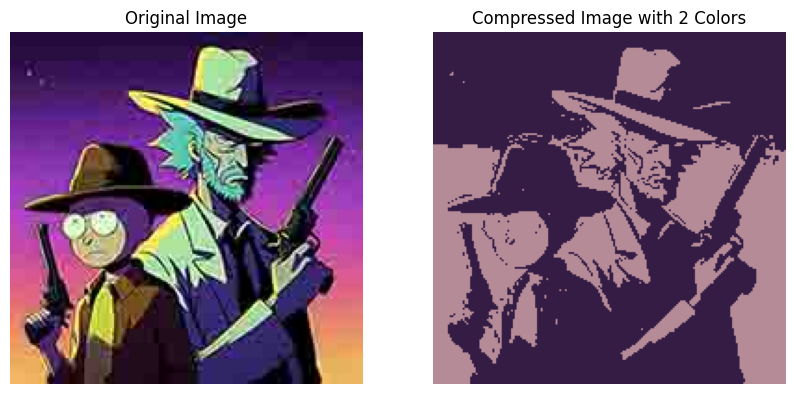

In [232]:
compress_image("rick.jpg", n_clusters=2)